# LIS 640 Applied Deep Learning : Backpropagation


# Code Blocks for Problem 2

In [3]:
import torch
import random
import statistics
from typing import Dict, List, Callable, Optional


def hello_two_layer_net():
    print("Hello from problem2.ipynb!")


def sample_batch(
    X: torch.Tensor, y: torch.Tensor, num_train: int, batch_size: int
):
    """
    Sample batch_size elements from the training data and their
    corresponding labels to use in this round of gradient descent.
    """
    indices = torch.randint(num_train, (batch_size,))
    y_batch = y[indices]
    X_batch = X[indices]
    return X_batch, y_batch


# Template class modules that we will use later: Do not edit/modify this class
class TwoLayerNet(object):
    def __init__(
        self,
        input_size: int,
        hidden_size: int,
        output_size: int,
        dtype: torch.dtype = torch.float32,
        device: str = "cuda",
        std: float = 1e-4,
    ):
        """
        Initialize the model. Weights are initialized to small random values and
        biases are initialized to zero. Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (D, H)
        W2: Second layer weights; has shape (H, C)

        Inputs:
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        - dtype: Optional, data type of each initial weight params
        - device: Optional, whether the weight params is on GPU or CPU
        - std: Optional, initial weight scaler.
        """
        # reset seed before start
        random.seed(0)
        torch.manual_seed(0)

        self.params = {}
        self.params["W1"] = std * torch.randn(
            input_size, hidden_size, dtype=dtype, device=device
        )
        self.params["W2"] = std * torch.randn(
            hidden_size, output_size, dtype=dtype, device=device
        )

    def loss(
        self,
        X: torch.Tensor,
        y: Optional[torch.Tensor] = None,
        reg: float = 0.0,
    ):
        return nn_forward_backward(self.params, X, y, reg)

    def train(
        self,
        X: torch.Tensor,
        y: torch.Tensor,
        X_val: torch.Tensor,
        y_val: torch.Tensor,
        learning_rate: float = 1e-3,
        learning_rate_decay: float = 0.95,
        reg: float = 5e-6,
        num_iters: int = 100,
        batch_size: int = 200,
        verbose: bool = False,
    ):
        # fmt: off
        return nn_train(
            self.params, nn_forward_backward, nn_predict, X, y,
            X_val, y_val, learning_rate, learning_rate_decay,
            reg, num_iters, batch_size, verbose,
        )
        # fmt: on

    def predict(self, X: torch.Tensor):
        return nn_predict(self.params, nn_forward_backward, X)

    def save(self, path: str):
        torch.save(self.params, path)
        print("Saved in {}".format(path))

    def load(self, path: str):
        checkpoint = torch.load(path, map_location="cpu")
        self.params = checkpoint
        if len(self.params) != 4:
            raise Exception("Failed to load your checkpoint")

        for param in ["W1", "W2"]:
            if param not in self.params:
                raise Exception("Failed to load your checkpoint")
        # print("load checkpoint file: {}".format(path))


def nn_forward_pass(params: Dict[str, torch.Tensor], X: torch.Tensor):
    """
    The first stage of our neural network implementation: Run the forward pass
    of the network to compute the hidden layer features and classification
    scores. The network architecture should be:

    FC layer -> ReLU (hidden) -> FC layer (scores)

    Inputs:
    - params: a dictionary of PyTorch Tensor that store the weights of a model.
      It should have following keys with shape
          W1: First layer weights; has shape (D, H)
          W2: Second layer weights; has shape (H, C)
    - X: Input data of shape (N, D). Each X[i] is a training sample.

    Returns a tuple of:
    - scores: Tensor of shape (N, C) giving the classification scores for X
    - hidden: Tensor of shape (N, H) giving the hidden layer representation
      for each input value (after the ReLU).
    """
    # Unpack variables from the params dictionary
    W1 = params["W1"]
    W2 = params["W2"]
    N, D = X.shape

    # Compute the forward pass
    hidden = None
    scores = None
    ############################################################################
    # TODO: Perform the forward pass, computing the class scores for the input.#
    # Store the result in the scores variable, which should be an tensor of    #
    # shape (N, C).                                                            #
    ############################################################################
    # Replace "pass" statement with your code
    hidden_pre_activation = X.mm(W1)
    hidden = torch.relu(hidden_pre_activation)
    scores = hidden.mm(W2)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return scores, hidden


def nn_forward_backward(
    params: Dict[str, torch.Tensor],
    X: torch.Tensor,
    y: Optional[torch.Tensor] = None,
    reg: float = 0.0
):
    """
    Compute the loss and gradients for a two layer fully connected neural
    network. When you implement loss and gradient, please don't forget to
    scale the losses/gradients by the batch size.

    Inputs: First two parameters (params, X) are same as nn_forward_pass
    - params: a dictionary of PyTorch Tensor that store the weights of a model.
      It should have following keys with shape
          W1: First layer weights; has shape (D, H)
          W2: Second layer weights; has shape (H, C)
    - X: Input data of shape (N, D). Each X[i] is a training sample.
    - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] < C. This parameter is optional; if it
      is not passed then we only return scores, and if it is passed then we
      instead return the loss and gradients.
    - reg: Regularization strength.

    Returns:
    If y is None, return a tensor scores of shape (N, C) where scores[i, c] is
    the score for class c on input X[i].

    If y is not None, instead return a tuple of:
    - loss: Loss (data loss and regularization loss) for this batch of training
      samples.
    - grads: Dictionary mapping parameter names to gradients of those parameters
      with respect to the loss function; has the same keys as self.params.
    """
    # Unpack variables from the params dictionary
    W1 = params["W1"]
    W2 = params["W2"]
    N, D = X.shape

    scores, h1 = nn_forward_pass(params, X)
    # If the targets are not given then jump out, we're done
    if y is None:
        return scores

    # Compute the loss
    loss = None
    ############################################################################
    # TODO: Compute the loss, based on the results from nn_forward_pass.       #
    ############################################################################
    # Replace "pass" statement with your code
    exp = torch.exp(scores - torch.max(scores, axis=1, keepdims=True).values)
    probs = exp / torch.sum(exp, axis=1, keepdims=True)
    correct_logprobs = -torch.log(probs[range(N), y] + 1e-7)
    data_loss = torch.sum(correct_logprobs) / N

    reg_loss = reg * 0.5 * (torch.sum(W1 * W1) + torch.sum(W2 * W2))
    loss = data_loss + reg_loss
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    # Backward pass: compute gradients
    grads = {}
    ###########################################################################
    # TODO: Compute the backward pass, computing the derivatives of the       #
    # weights and biases. Store the results in the grads dictionary.          #
    # For example, grads['W1'] should store the gradient on W1, and be a      #
    # tensor of same size                                                     #
    ###########################################################################
    # Replace "pass" statement with your code
    dscores = probs
    dscores[range(N), y] -= 1
    dscores /= N
    dW2 = h1.t().mm(dscores)
    dW2 += reg * W2
    grads['W2'] = dW2
    dhidden = dscores.mm(W2.t())
    dhidden[h1 <= 0] = 0
    dW1 = X.t().mm(dhidden)
    dW1 += reg * W1
    grads['W1'] = dW1
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return loss, grads


def nn_train(
    params: Dict[str, torch.Tensor],
    loss_func: Callable,
    pred_func: Callable,
    X: torch.Tensor,
    y: torch.Tensor,
    X_val: torch.Tensor,
    y_val: torch.Tensor,
    learning_rate: float = 1e-3,
    learning_rate_decay: float = 0.95,
    reg: float = 5e-6,
    num_iters: int = 100,
    batch_size: int = 200,
    verbose: bool = False,
):
    """
    Train this neural network using stochastic gradient descent.

    Inputs:
    - params: a dictionary of PyTorch Tensor that store the weights of a model.
      It should have following keys with shape
          W1: First layer weights; has shape (D, H)
          W2: Second layer weights; has shape (H, C)
    - loss_func: a loss function that computes the loss and the gradients.
      It takes as input:
      - params: Same as input to nn_train
      - X_batch: A minibatch of inputs of shape (B, D)
      - y_batch: Ground-truth labels for X_batch
      - reg: Same as input to nn_train
      And it returns a tuple of:
        - loss: Scalar giving the loss on the minibatch
        - grads: Dictionary mapping parameter names to gradients of the loss with
          respect to the corresponding parameter.
    - pred_func: prediction function that im
    - X: A PyTorch tensor of shape (N, D) giving training data.
    - y: A PyTorch tensor of shape (N,) giving training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < C.
    - X_val: A PyTorch tensor of shape (N_val, D) giving validation data.
    - y_val: A PyTorch tensor of shape (N_val,) giving validation labels.
    - learning_rate: Scalar giving learning rate for optimization.
    - learning_rate_decay: Scalar giving factor used to decay the learning rate
      after each epoch.
    - reg: Scalar giving regularization strength.
    - num_iters: Number of steps to take when optimizing.
    - batch_size: Number of training examples to use per step.
    - verbose: boolean; if true print progress during optimization.

    Returns: A dictionary giving statistics about the training process
    """
    num_train = X.shape[0]
    iterations_per_epoch = max(num_train // batch_size, 1)

    # Use SGD to optimize the parameters in self.model
    loss_history = []
    train_acc_history = []
    val_acc_history = []

    for it in range(num_iters):
        X_batch, y_batch = sample_batch(X, y, num_train, batch_size)

        # Compute loss and gradients using the current minibatch
        loss, grads = loss_func(params, X_batch, y=y_batch, reg=reg)
        loss_history.append(loss.item())

        #########################################################################
        # TODO: Use the gradients in the grads dictionary to update the         #
        # parameters of the network (stored in the dictionary self.params)      #
        # using stochastic gradient descent. You'll need to use the gradients   #
        # stored in the grads dictionary defined above.                         #
        #########################################################################
        # Replace "pass" statement with your code
        for param_name in params:
            params[param_name] -= learning_rate * grads[param_name]
        #########################################################################
        #                             END OF YOUR CODE                          #
        #########################################################################

        if verbose and it % 100 == 0:
            print("iteration %d / %d: loss %f" % (it, num_iters, loss.item()))

        # Every epoch, check train and val accuracy and decay learning rate.
        if it % iterations_per_epoch == 0:
            # Check accuracy
            y_train_pred = pred_func(params, loss_func, X_batch)
            train_acc = (y_train_pred == y_batch).float().mean().item()
            y_val_pred = pred_func(params, loss_func, X_val)
            val_acc = (y_val_pred == y_val).float().mean().item()
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)

            # Decay learning rate
            learning_rate *= learning_rate_decay

    return {
        "loss_history": loss_history,
        "train_acc_history": train_acc_history,
        "val_acc_history": val_acc_history,
    }


def nn_predict(
    params: Dict[str, torch.Tensor], loss_func: Callable, X: torch.Tensor
):
    """
    Use the trained weights of this two-layer network to predict labels for
    data points. For each data point we predict scores for each of the C
    classes, and assign each data point to the class with the highest score.

    Inputs:
    - params: a dictionary of PyTorch Tensor that store the weights of a model.
      It should have following keys with shape
          W1: First layer weights; has shape (D, H)
          W2: Second layer weights; has shape (H, C)
    - loss_func: a loss function that computes the loss and the gradients
    - X: A PyTorch tensor of shape (N, D) giving N D-dimensional data points to
      classify.

    Returns:
    - y_pred: A PyTorch tensor of shape (N,) giving predicted labels for each of
      the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
      to have class c, where 0 <= c < C.
    """
    y_pred = None
    results,_ = nn_forward_pass(params, X)
    _, y_pred =  results.max(dim = 1)
    return y_pred

# Questions for Problem 2

# Set up code

In [4]:
import utils
import torch
import matplotlib.pyplot as plt
%matplotlib inline


plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Implementing a Two-Layer Network
In this exercise we will develop a Two-Layer Network with fully-connected layers to perform classification, and test it out on the MNIST dataset.

We train the network with a Cross-Entropy loss function. The network uses a ReLU activation function after the first fully connected layer.

In other words, the network has the following architecture:

  input - fully connected layer - ReLU - fully connected layer - Softmax - Cross-Entropy

We denote the input example as $x$, the ground truth label as $y$, the first fully connected layer output as $h$, the activation function output as $a$ and the second fully connected layer output as $s$. The complete process of the two-layer network is illustrated below.

$h = W_1^Tx$

$a = ReLU(h)$

$s = W_2^Ta$

$loss = CrossEntropy(softmax(s),y)$

Here $softmax(z)_i=\frac{e^{z_i}}{\sum^K_{j=1}e^{z_j}}$ and $CrossEntropy(y',y)=-\sum_i y'_i log(y_i)$.



## Play with a toy data

The inputs to our network will be a batch of $N$ (`num_inputs`) $D$-dimensional vectors (`input_size`); the hidden layer will have $H$ hidden units (`hidden_size`), and we will predict classification scores for $C$ categories (`num_classes`). This means that the learnable weights of the network will have the following shapes:

*   W1: First layer weights; has shape (D, H)
*   W2: Second layer weights; has shape (H, C)

We will use `utils.get_toy_data` function to generate random weights for a small toy model while we implement the model.

### Forward pass: compute scores
We want to write a function that takes as input the model weights and a batch of images and labels, and returns the loss and the gradient of the loss with respect to each model parameter.

However rather than attempting to implement the entire function at once, we will take a staged approach and ask you to implement the full forward and backward pass one step at a time.

First we will implement the forward pass of the network which uses the weights and biases to compute scores for all inputs in `nn_forward_pass`.

Compute the scores and compare with the answer. The distance gap should be smaller than 1e-10.

In [5]:
import utils

utils.reset_seed(0)
toy_X, toy_y, params = utils.get_toy_data()

# YOUR_TURN: Implement the score computation part of nn_forward_pass
scores, _ = nn_forward_pass(params, toy_X)
print('Your scores:')
print(scores)
print(scores.dtype)
print()
print('correct scores:')
correct_scores = torch.tensor([
        [ 9.7003e-08, -1.1143e-07, -3.9961e-08],
        [-7.4297e-08,  1.1502e-07,  1.5685e-07],
        [-2.5860e-07,  2.2765e-07,  3.2453e-07],
        [-4.7257e-07,  9.0935e-07,  4.0368e-07],
        [-1.8395e-07,  7.9303e-08,  6.0360e-07]], dtype=torch.float32, device=scores.device)
print(correct_scores)
print()

# The difference should be very small. We get < 1e-10
scores_diff = (scores - correct_scores).abs().sum().item()
print('Difference between your scores and correct scores: %.2e' % scores_diff)

Your scores:
tensor([[ 9.7003e-08, -1.1143e-07, -3.9961e-08],
        [-7.4297e-08,  1.1502e-07,  1.5685e-07],
        [-2.5860e-07,  2.2765e-07,  3.2453e-07],
        [-4.7257e-07,  9.0935e-07,  4.0368e-07],
        [-1.8395e-07,  7.9303e-08,  6.0360e-07]], device='cuda:0')
torch.float32

correct scores:
tensor([[ 9.7003e-08, -1.1143e-07, -3.9961e-08],
        [-7.4297e-08,  1.1502e-07,  1.5685e-07],
        [-2.5860e-07,  2.2765e-07,  3.2453e-07],
        [-4.7257e-07,  9.0935e-07,  4.0368e-07],
        [-1.8395e-07,  7.9303e-08,  6.0360e-07]], device='cuda:0')

Difference between your scores and correct scores: 2.24e-11


### Forward pass: compute loss
Now, we implement the first part of `nn_forward_backward` that computes the loss.

For the data loss, we compute the Cross-Entropy loss. Note that the final loss shold be an average loss of $N$ input examples.

First, Let's run the following to check your implementation.

We compute the loss for the toy data, and compare with the answer computed by our implementation. The difference between the correct and computed loss should be less than `1e-4`.

In [6]:
import utils

utils.reset_seed(0)
toy_X, toy_y, params = utils.get_toy_data()

# YOUR_TURN: Implement the loss computation part of nn_forward_backward
loss, _ = nn_forward_backward(params, toy_X, toy_y)
print('Your loss: ', loss.item())
correct_loss = 1.0986121892929077
print('Correct loss: ', correct_loss)
diff = (correct_loss - loss).item()

# should be very small, we get < 1e-4
print('Difference: %.4e' % diff)

Your loss:  1.0986119508743286
Correct loss:  1.0986121892929077
Difference: 2.3842e-07


### Backward pass
Now implement the backward pass for the entire network in `nn_forward_backward`.

After doing so, we will use numeric gradient checking to see whether the analytic gradient computed by our backward pass mateches a numeric gradient.

We will use the functions `utils.compute_numeric_gradient` and `utils.rel_error` to help with numeric gradient checking.


Hint: For gradient computation of Softmax Cross-Entropy loss, please refer to https://www.michaelpiseno.com/blog/2021/softmax-gradient/.

Now we will compute the gradient of the loss with respect to the variables `W1` and `W2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check.

You should see relative errors less than `1e-4` for all parameters.

In [7]:
import utils

utils.reset_seed(0)

toy_X, toy_y, params = utils.get_toy_data(dtype=torch.float64)

# YOUR_TURN: Implement the gradient computation part of nn_forward_backward
#            When you implement the gradient computation part, you may need to
#            implement the `hidden` output in nn_forward_pass, as well.
loss, grads = nn_forward_backward(params, toy_X, toy_y)

for param_name, grad in grads.items():
  param = params[param_name]
  f = lambda w: nn_forward_backward(params, toy_X, toy_y)[0]
  grad_numeric = utils.compute_numeric_gradient(f, param)
  error = utils.rel_error(grad, grad_numeric)
  print('%s max relative error: %e' % (param_name, error))

W2 max relative error: 1.278115e-06
W1 max relative error: 1.368676e-06


### Train the network
To train the network we will use stochastic gradient descent (SGD).

Look at the function `nn_train` and fill in the missing sections to implement the training procedure.

Once you have implemented the method, run the code below to train a two-layer network on toy data. Your final training loss should be less than 1.0.

Final training loss:  0.6050100326538086


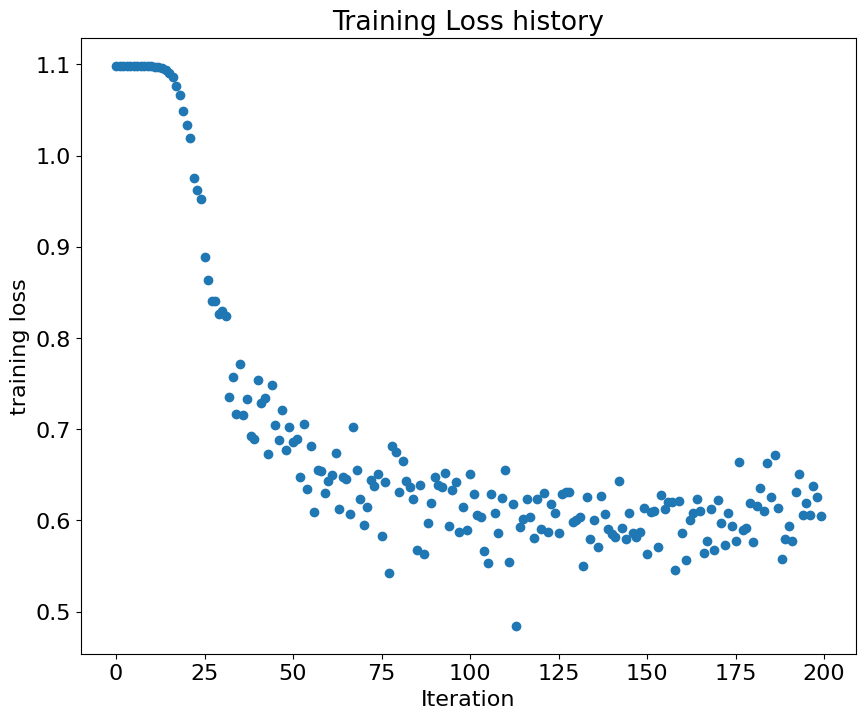

In [8]:
import utils
from utils import get_toy_data

utils.reset_seed(0)
toy_X, toy_y, params = get_toy_data()

# YOUR_TURN: Implement the nn_train function.
#            You may need to check nn_predict function (the "pred_func") as well.
stats = nn_train(params, nn_forward_backward, nn_predict, toy_X, toy_y, toy_X, toy_y,
                 learning_rate=1e-1, reg=1e-6,
                 num_iters=200, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'], 'o')
plt.xlabel('Iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Testing our NN on a real dataset: MNIST
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our MNIST data so we can use it to train a classifier on a real dataset.

In [9]:
import utils


# Invoke the above function to get our data.
utils.reset_seed(0)
x_train, y_train, x_val, y_val = utils.load_data()

100%|██████████| 9912422/9912422 [00:00<00:00, 127934319.18it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 114711831.27it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 76550644.17it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4303259.27it/s]


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



### Wrap all function into a Class
We will use the class `TwoLayerNet` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are PyTorch tensors.




### Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [10]:
import utils

input_size = 1 * 28 * 28
hidden_size = 36
num_classes = 10

# fix random seed before we generate a set of parameters
utils.reset_seed(0)
net = TwoLayerNet(input_size, hidden_size, num_classes, dtype=torch.float32, device='cpu')

# Train the network
stats = net.train(x_train, y_train,
                  x_val, y_val,
                  num_iters=500, batch_size=1000,
                  learning_rate=1e-1, learning_rate_decay=0.95,
                  verbose=True)

# Predict on the validation set
y_val_pred = net.predict(x_val)
val_acc = 100.0 * (y_val_pred == y_val).double().mean().item()
print('Validation accuracy: %.2f%%' % val_acc)

iteration 0 / 500: loss 2.302584
iteration 100 / 500: loss 2.301893
iteration 200 / 500: loss 1.799361
iteration 300 / 500: loss 0.858400
iteration 400 / 500: loss 0.635817
Validation accuracy: 85.97%
